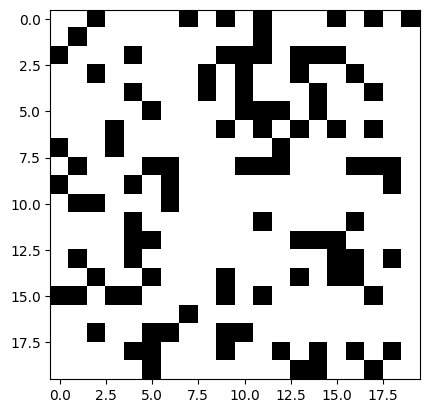

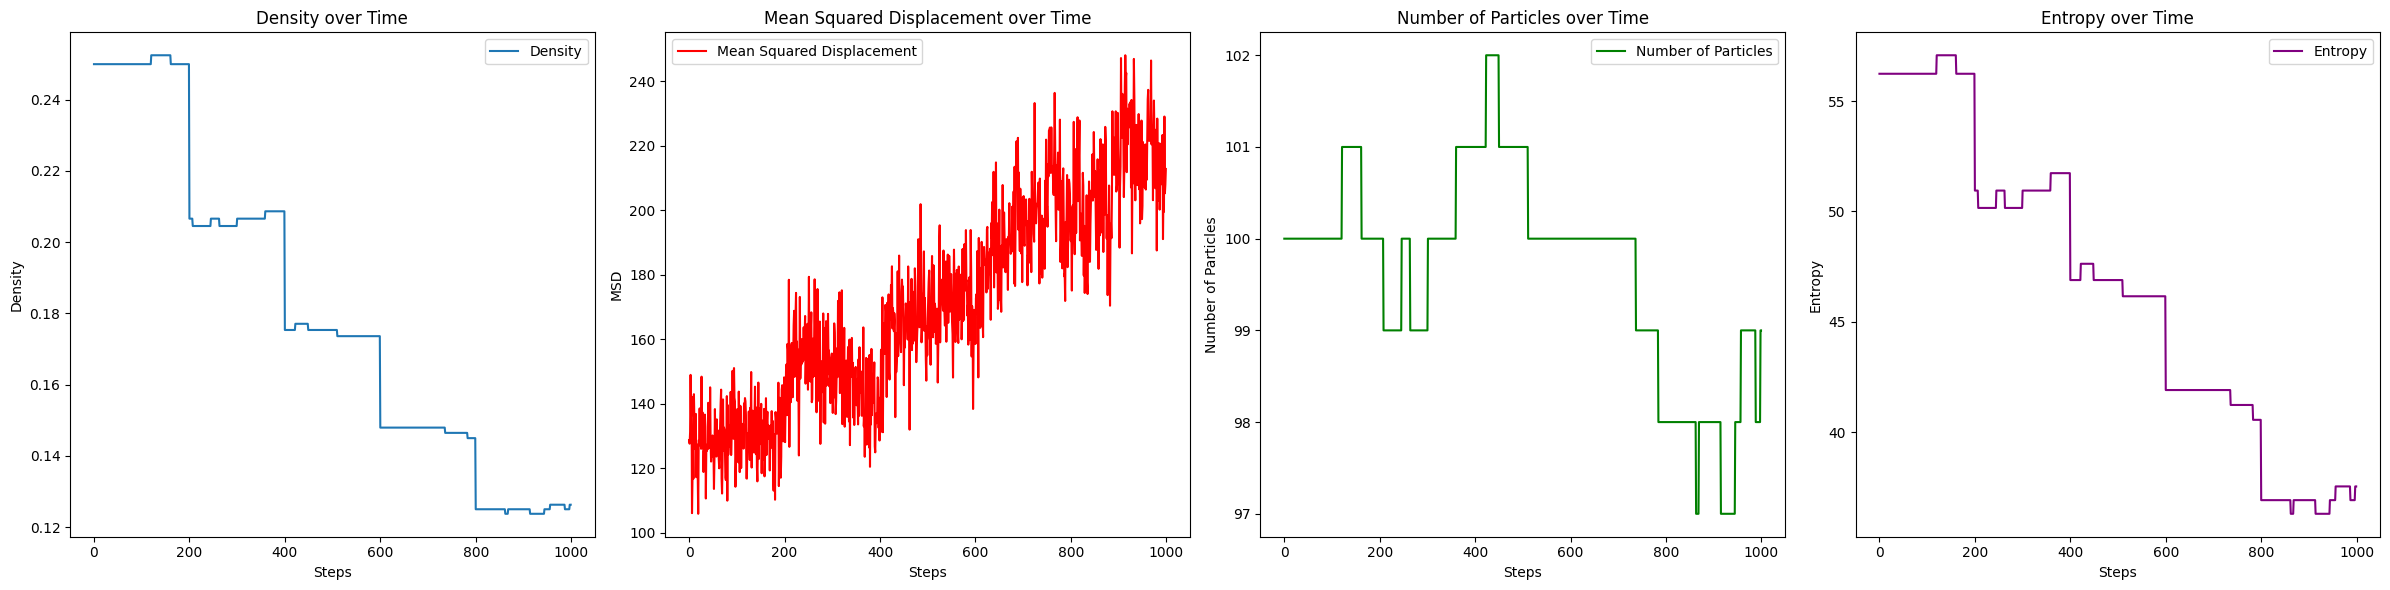

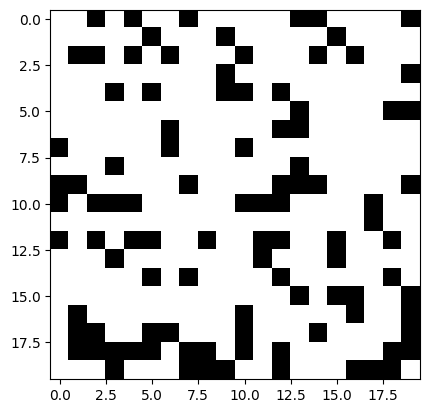

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Parameters
initial_L = 20  # Initial lattice size
initial_N = 100  # Initial number of particles
steps = 1000  # Number of simulation steps
prob_add = 0.01  # Probability of adding a particle
prob_remove = 0.01  # Probability of removing a particle
expand_interval = 200  # Interval at which the lattice expands
expand_size = 2  # Amount by which the lattice size increases

# Initialize the lattice with zeros
L = initial_L
lattice = np.zeros((L, L), dtype=int)
positions = []

# Randomly place initial_N particles on the lattice
for _ in range(initial_N):
    while True:
        x = random.randint(0, L-1)
        y = random.randint(0, L-1)
        if lattice[x, y] == 0:
            lattice[x, y] = 1
            positions.append((x, y))
            break

def display_lattice(lattice):
    plt.imshow(lattice, cmap='binary')
    plt.show()

# Function to expand the lattice
def expand_lattice(lattice, positions, expand_size):
    L = lattice.shape[0]
    new_L = L + expand_size
    new_lattice = np.zeros((new_L, new_L), dtype=int)
    new_positions = []
    for (x, y) in positions:
        new_lattice[x, y] = 1
        new_positions.append((x, y))
    return new_lattice, new_positions

# Function to gather and plot statistical data
def gather_statistics(lattice, positions, steps, prob_add, prob_remove, expand_interval, expand_size):
    densities = []
    msd = []
    num_particles = [len(positions)]
    entropies = []
    initial_positions = positions.copy()

    for step in range(steps):
        if step > 0 and step % expand_interval == 0:
            lattice, positions = expand_lattice(lattice, positions, expand_size)

        for _ in range(len(positions)):
            while True:
                x = random.randint(0, lattice.shape[0]-1)
                y = random.randint(0, lattice.shape[1]-1)
                if lattice[x, y] == 1:
                    break

            direction = random.choice(['up', 'down', 'left', 'right'])

            if direction == 'up':
                new_x = (x - 1) % lattice.shape[0]
                new_y = y
            elif direction == 'down':
                new_x = (x + 1) % lattice.shape[0]
                new_y = y
            elif direction == 'left':
                new_x = x
                new_y = (y - 1) % lattice.shape[1]
            elif direction == 'right':
                new_x = x
                new_y = (y + 1) % lattice.shape[1]

            if lattice[new_x, new_y] == 0:
                lattice[x, y] = 0
                lattice[new_x, new_y] = 1
                positions.remove((x, y))
                positions.append((new_x, new_y))

        # Particle addition
        if random.random() < prob_add:
            while True:
                x = random.randint(0, lattice.shape[0]-1)
                y = random.randint(0, lattice.shape[1]-1)
                if lattice[x, y] == 0:
                    lattice[x, y] = 1
                    positions.append((x, y))
                    break

        # Particle removal
        if random.random() < prob_remove and len(positions) > 0:
            remove_idx = random.randint(0, len(positions) - 1)
            x, y = positions.pop(remove_idx)
            lattice[x, y] = 0

        # Compute density
        density = len(positions) / (lattice.shape[0] * lattice.shape[1])
        densities.append(density)

        # Compute mean squared displacement
        total_msd = 0
        for initial_pos, current_pos in zip(initial_positions, positions):
            initial_x, initial_y = initial_pos
            current_x, current_y = current_pos
            distance_squared = (initial_x - current_x)**2 + (initial_y - current_y)**2
            total_msd += distance_squared

        mean_msd = total_msd / len(positions) if len(positions) > 0 else 0
        msd.append(mean_msd)
        num_particles.append(len(positions))

        # Compute entropy
        p = len(positions) / (lattice.shape[0] * lattice.shape[1])
        if p > 0 and p < 1:
            entropy = -len(positions) * (p * np.log(p) + (1 - p) * np.log(1 - p))
        else:
            entropy = 0
        entropies.append(entropy)

    return densities, msd, num_particles, entropies

def plot_statistics(densities, msd, num_particles, entropies, steps):
    plt.figure(figsize=(24, 6))

    plt.subplot(1, 4, 1)
    plt.plot(range(steps), densities, label='Density')
    plt.xlabel('Steps')
    plt.ylabel('Density')
    plt.title('Density over Time')
    plt.legend()

    plt.subplot(1, 4, 2)
    plt.plot(range(steps), msd, label='Mean Squared Displacement', color='red')
    plt.xlabel('Steps')
    plt.ylabel('MSD')
    plt.title('Mean Squared Displacement over Time')
    plt.legend()

    plt.subplot(1, 4, 3)
    plt.plot(range(steps), num_particles[:-1], label='Number of Particles', color='green')
    plt.xlabel('Steps')
    plt.ylabel('Number of Particles')
    plt.title('Number of Particles over Time')
    plt.legend()

    plt.subplot(1, 4, 4)
    plt.plot(range(steps), entropies, label='Entropy', color='purple')
    plt.xlabel('Steps')
    plt.ylabel('Entropy')
    plt.title('Entropy over Time')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Display initial configuration
display_lattice(lattice)

# Gather statistics
densities, msd, num_particles, entropies = gather_statistics(lattice, positions, steps, prob_add, prob_remove, expand_interval, expand_size)

# Plot statistics
plot_statistics(densities, msd, num_particles, entropies, steps)

# Display final configuration
display_lattice(lattice)
